# Vizualize Diff Means Models of for Different Contexts
* For all of the metrics
* apply 3 different styles

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

In [3]:
matplotlib.rcParams.update({'font.size': 12})

## Load Results for all Metrics

In [6]:
SIM = pd.read_csv('scores_mean_models_diff_' + 'SIM' + '.csv')
NSS = pd.read_csv('scores_mean_models_diff_' + 'NSS' + '.csv')
AUC = pd.read_csv('scores_mean_models_diff_' + 'AUC' + '.csv')
IG = pd.read_csv('scores_mean_models_diff_' + 'IG' + '.csv')

#### Set Contexts as Index

In [8]:
SIM.set_index('context', inplace=True)
NSS.set_index('context', inplace=True)
AUC.set_index('context', inplace=True)
IG.set_index('context', inplace=True)

### Remove Faulty Calculated Mean Model

In [9]:
SIM = SIM.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
NSS = NSS.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
AUC = AUC.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
IG = IG.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
SIM


,0.3,0.5,0.7
context,,,
all,-1.730887,-0.520403,0.849288
person,-1.278146,0.762834,3.061536
no person,-2.383068,-2.382606,-2.361077
animal,-3.755110,-3.391980,-2.917933
electronic,-0.604391,1.353682,3.464629
sports,-2.996903,-1.937462,-0.581364


## Vizualize

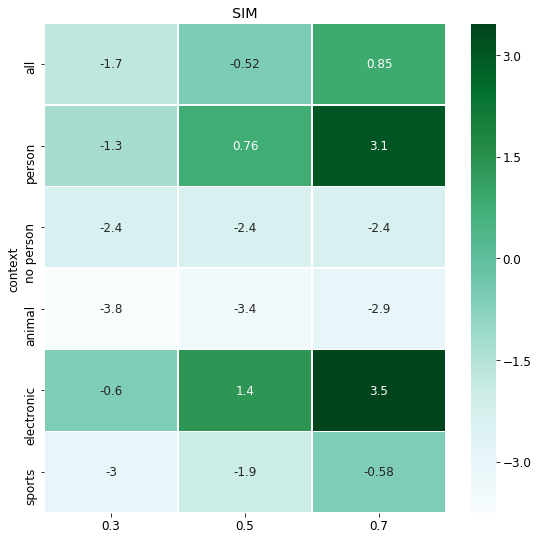

In [10]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax, cmap='BuGn' );
plt.title('SIM');

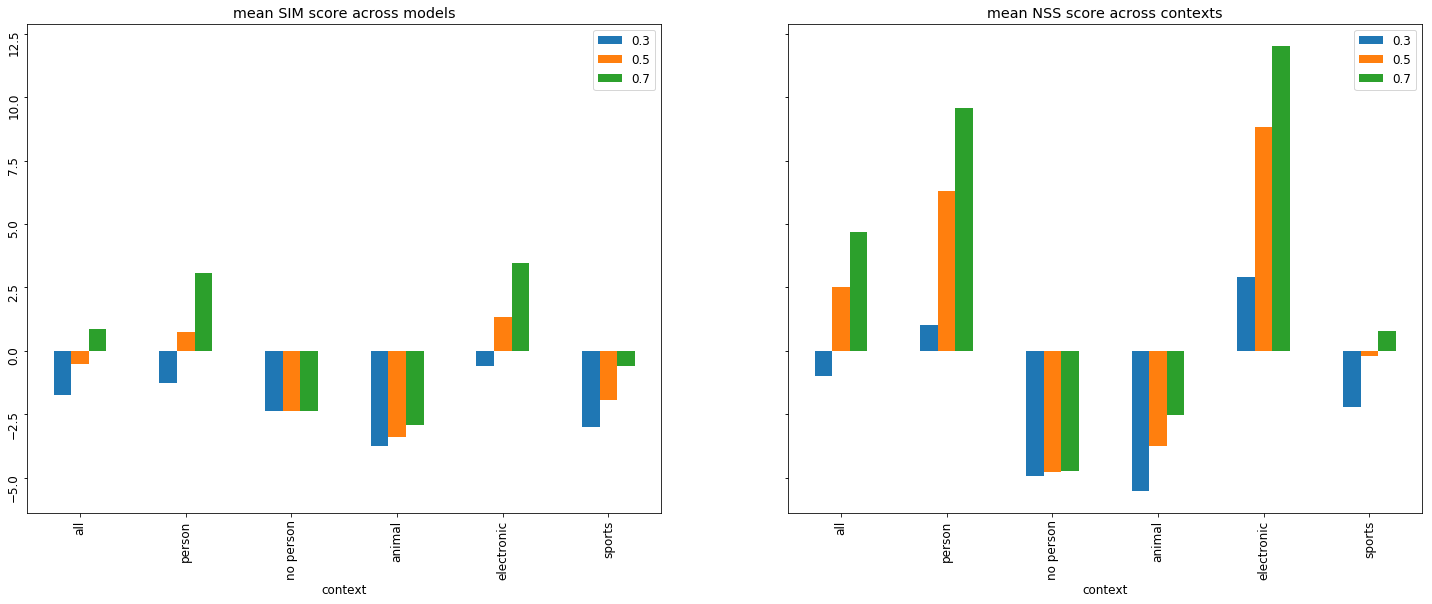

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(25,9), sharex=False, sharey=True)

im = SIM.plot(kind="bar", ax=ax[0])
NSS.plot(kind="bar", ax=ax[1])

mappable = im.get_children()[0]

ax[0].set_title('mean {} score across models'.format('SIM'))
ax[1].set_title('mean {} score across contexts'.format('NSS'))

ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

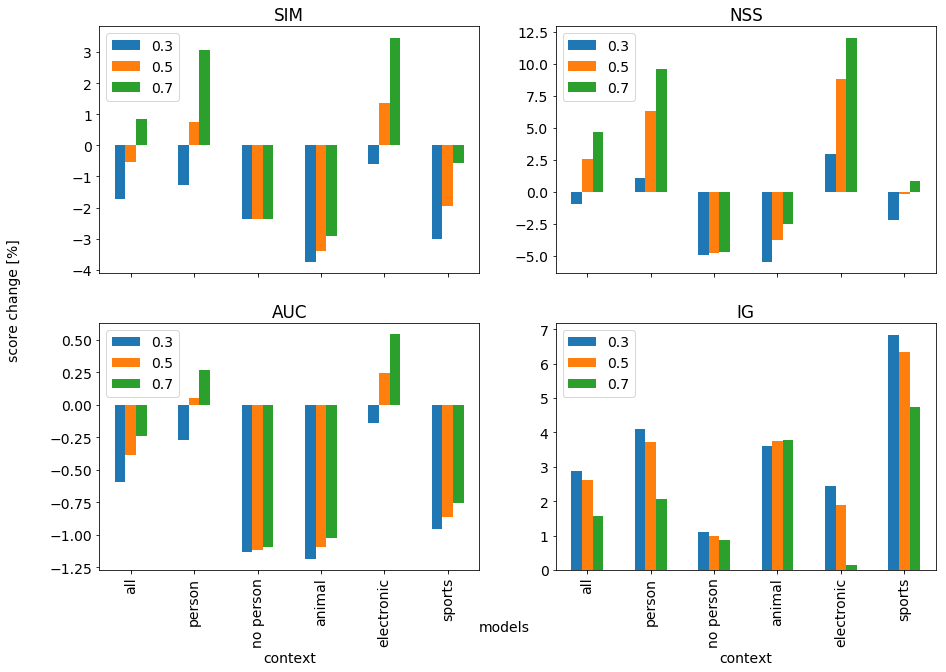

In [12]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=False)

im = SIM.plot(kind="bar", ax=ax[0][0])
NSS.plot(kind="bar", ax=ax[0][1])
AUC.plot(kind="bar", ax=ax[1][0])
IG.plot(kind="bar", ax=ax[1][1])

mappable = im.get_children()[0]

ax[0][0].set_title('{}'.format('SIM'))
ax[0][1].set_title('{}'.format('NSS'))
ax[1][0].set_title('{}'.format('AUC'))
ax[1][1].set_title('{}'.format('IG'));

fig.text(0.04, 0.5, 'score change [%]', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'models', ha='center');